In [2]:
#Box destinated to import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans, MeanShift, estimate_bandwidth
from sklearn import linear_model, neighbors
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241A1FBEA58>,
      dtype=object)

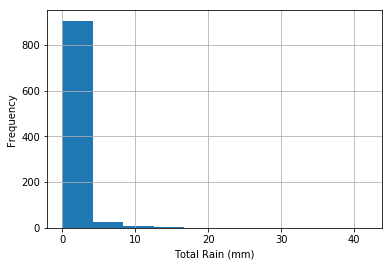

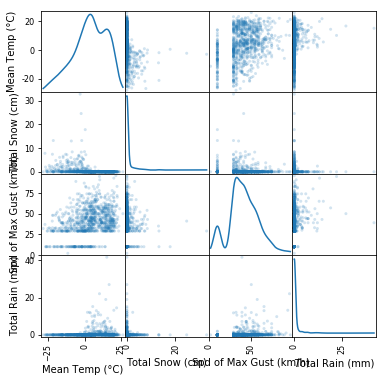

In [3]:
#Importing dataset
data = pd.read_csv(r'C:\Users\Lucas\OneDrive\Canada\Lucas\MEng U OF CALGARY\Fall 2019\ENCH 619 - Special Topics\Project\Dados\Master_Data_clustering_and_regression.csv',encoding='latin1')

#Adjusting Date column to datetime using Pandas
data['Date'] = pd.to_datetime(data['Date'])

#Creating column for the day of the week
data['Weekday'] = data.Date.dt.weekday_name

#Removing missing data
data = data.dropna(subset=['Mean Temp (°C)','Total Snow (cm)','Spd of Max Gust (km/h)','Total Rain (mm)'])
data1 = data.loc[:,['Mean Temp (°C)','Total Snow (cm)','Spd of Max Gust (km/h)','Total Rain (mm)']]

#Creating classes as True Labels

Classes = np.array(data['Number of incidents'])

for i in range(len(Classes)):
    if Classes[i] <= 15:
        Classes[i] = 0
    elif Classes[i] <=20:
        Classes[i] = 1
    else:
        Classes[i]=2

#Adding to the dataset
data['True Classes'] = Classes
Classes_names =['Low','Medium','High']

#Importing data from each year
data_2016_2017_2018 = data.loc[data.Date.dt.year <2019,:]
data_2018 = data.loc[data.Date.dt.year == 2018,:]
data_2019 = data.loc[data.Date.dt.year == 2019,:]

data_train = data_2016_2017_2018

## EXTRA ANALYSIS
data['Total Rain (mm)'].hist()
plt.ylabel('Frequency')
plt.xlabel('Total Rain (mm)')

from pandas.plotting import scatter_matrix

scatter_matrix(data1, alpha=0.2, figsize=(6, 6), diagonal='kde')


DBSCAN: Homogeneity is 0.0375; Completeness is 0.1789; FMI is 0.6429
 
MEAN SHIFT: Homogeneity is 0.0673; Completeness is 0.0372; FMI is 0.3284
 
KMEANS: Inertia is 7583.2499 Homogeneity is 0.0199; Completeness is 0.0284; FMI is 0.4797


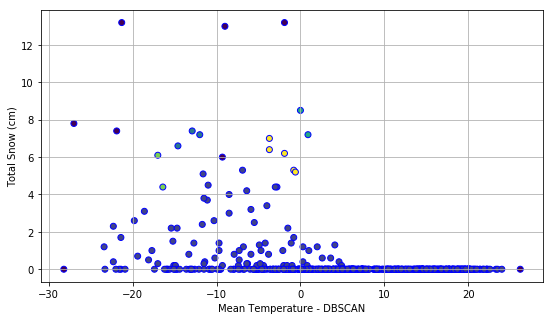

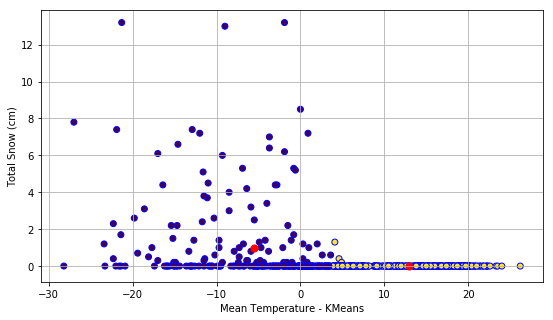

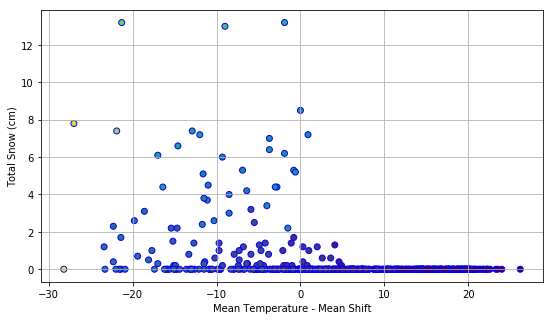

In [21]:
#PERFORMING DBSCAN - MEAN TEMPERATURE vs Snow

#########################################################################################################################

#SELECTING THE DATASET
Tdata = np.array([data_train['Mean Temp (°C)'],data_train['Total Snow (cm)']])
Ttrue = np.array(data_train['True Classes'])
Tdata=Tdata.T

#Splitting the dataset
Ttrain, Ttest,Ttrue_train,Ttrue_test = train_test_split(Tdata, Ttrue, test_size=0.2)

###########################################################################################################################


#Fitting models
#DBSCAN
db = DBSCAN(eps=2, min_samples=2)
db.fit(Ttrain)

#KMEANS
clust=KMeans(n_clusters=2, n_init=10, tol=0.0001)
clust.fit(Ttrain)
centroids = clust.cluster_centers_

#MEAN SHIFT
ms = MeanShift(bandwidth=3)
ms.fit(Ttrain)
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Ttrain, quantile=0.2, n_samples=2)

###########################################################################################################################


#Plots
#DBSCAN
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=db.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Mean Temperature - DBSCAN")
plt.ylabel("Total Snow (cm)")
plt.title("")
plt.grid()

#KMEANS
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=clust.labels_.astype(float), edgecolor='blue' )
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50 )
plt.xlabel("Mean Temperature - KMeans")
plt.ylabel("Total Snow (cm)")
plt.title("")
plt.grid()

#MEAN SHIFT
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=ms.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Mean Temperature - Mean Shift")
plt.ylabel("Total Snow (cm)")
plt.title("")
plt.grid()


#Calculating parameters

#DBSCAN
H1=metrics.homogeneity_score(Ttrue_train,db.labels_.astype(float))  #Homogeneity
C1=metrics.completeness_score(Ttrue_train,db.labels_.astype(float))
F1=metrics.fowlkes_mallows_score(Ttrue_train,db.labels_.astype(float))

#MEAN SHIFT
H2=metrics.homogeneity_score(Ttrue_train,ms.labels_.astype(float))  #Homogeneity
C2=metrics.completeness_score(Ttrue_train,ms.labels_.astype(float))
F2=metrics.fowlkes_mallows_score(Ttrue_train,ms.labels_.astype(float))

#KMEANS
H3=metrics.homogeneity_score(Ttrue_train,clust.labels_.astype(float))  #Homogeneity
C3=metrics.completeness_score(Ttrue_train,clust.labels_.astype(float))
F3=metrics.fowlkes_mallows_score(Ttrue_train,clust.labels_.astype(float))
clust.predict(Ttest)
scorekmeans=clust.score(Ttest)

print('DBSCAN: Homogeneity is ' + str(round(H1,4)) + '; Completeness is ' + str(round(C1,4)) + '; FMI is ' + str(round(F1,4)))
print(' ')
print('MEAN SHIFT: Homogeneity is ' + str(round(H2,4)) + '; Completeness is ' + str(round(C2,4)) + '; FMI is ' + str(round(F2,4)))
print(' ')
print('KMEANS: Inertia is ' + str(round(-scorekmeans,4)) + ' Homogeneity is ' + str(round(H3,4)) + '; Completeness is ' + str(round(C3,4)) + '; FMI is ' + str(round(F3,4)))

DBSCAN: Homogeneity is 0.1388; Completeness is 0.0399; FMI is 0.1442
 
MEAN SHIFT: Homogeneity is 0.1225; Completeness is 0.0358; FMI is 0.1385
 
KMEANS: Inertia is 31609.787 Homogeneity is 0.0155; Completeness is 0.0232; FMI is 0.4655


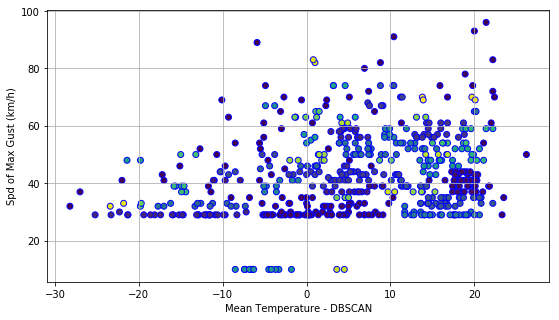

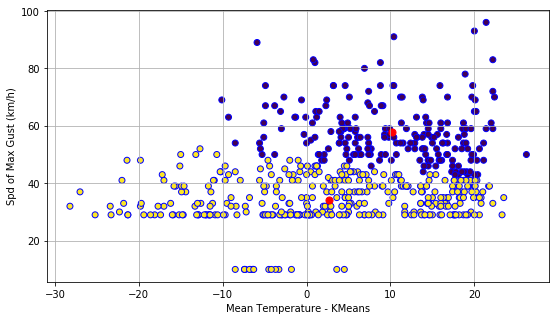

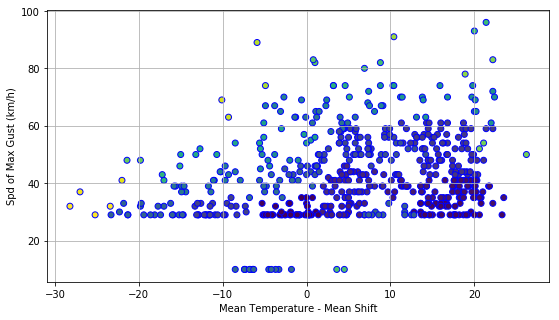

In [22]:
#PERFORMING DBSCAN - MEAN TEMPERATURE vs WIND

#########################################################################################################################

#SELECTING THE DATASET
Tdata = np.array([data_train['Mean Temp (°C)'],data_train['Spd of Max Gust (km/h)']])
Ttrue = np.array(data_train['True Classes'])
Tdata=Tdata.T

#Splitting the dataset
Ttrain, Ttest,Ttrue_train,Ttrue_test = train_test_split(Tdata, Ttrue, test_size=0.2)

###########################################################################################################################


#Fitting models
#DBSCAN
db = DBSCAN(eps=2, min_samples=2)
db.fit(Ttrain)

#KMEANS
clust=KMeans(n_clusters=2, n_init=10, tol=0.0001)
clust.fit(Ttrain)
centroids = clust.cluster_centers_

#MEAN SHIFT
ms = MeanShift(bandwidth=4)
ms.fit(Ttrain)
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Ttrain, quantile=0.2, n_samples=3)

###########################################################################################################################


#Plots
#DBSCAN
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=db.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Mean Temperature - DBSCAN")
plt.ylabel("Spd of Max Gust (km/h)")
plt.title("")
plt.grid()

#KMEANS
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=clust.labels_.astype(float), edgecolor='blue' )
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50 )
plt.xlabel("Mean Temperature - KMeans")
plt.ylabel("Spd of Max Gust (km/h)")
plt.title("")
plt.grid()

#MEAN SHIFT
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=ms.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Mean Temperature - Mean Shift")
plt.ylabel("Spd of Max Gust (km/h)")
plt.title("")
plt.grid()


#Calculating parameters

#DBSCAN
H1=metrics.homogeneity_score(Ttrue_train,db.labels_.astype(float))  #Homogeneity
C1=metrics.completeness_score(Ttrue_train,db.labels_.astype(float))
F1=metrics.fowlkes_mallows_score(Ttrue_train,db.labels_.astype(float))

#MEAN SHIFT
H2=metrics.homogeneity_score(Ttrue_train,ms.labels_.astype(float))  #Homogeneity
C2=metrics.completeness_score(Ttrue_train,ms.labels_.astype(float))
F2=metrics.fowlkes_mallows_score(Ttrue_train,ms.labels_.astype(float))

#KMEANS
H3=metrics.homogeneity_score(Ttrue_train,clust.labels_.astype(float))  #Homogeneity
C3=metrics.completeness_score(Ttrue_train,clust.labels_.astype(float))
F3=metrics.fowlkes_mallows_score(Ttrue_train,clust.labels_.astype(float))
clust.predict(Ttest)
scorekmeans=clust.score(Ttest)

print('DBSCAN: Homogeneity is ' + str(round(H1,4)) + '; Completeness is ' + str(round(C1,4)) + '; FMI is ' + str(round(F1,4)))
print(' ')
print('MEAN SHIFT: Homogeneity is ' + str(round(H2,4)) + '; Completeness is ' + str(round(C2,4)) + '; FMI is ' + str(round(F2,4)))
print(' ')
print('KMEANS: Inertia is ' + str(round(-scorekmeans,4)) + ' Homogeneity is ' + str(round(H3,4)) + '; Completeness is ' + str(round(C3,4)) + '; FMI is ' + str(round(F3,4)))

DBSCAN: Homogeneity is 0.005; Completeness is 0.0483; FMI is 0.6433
 
MEAN SHIFT: Homogeneity is 0.0482; Completeness is 0.025; FMI is 0.2935
 
KMEANS: Inertia is 6712.3446 Homogeneity is 0.0188; Completeness is 0.0265; FMI is 0.4834


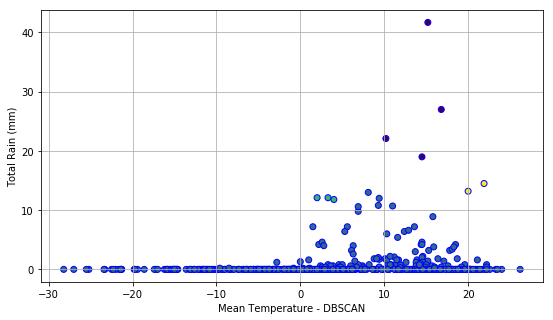

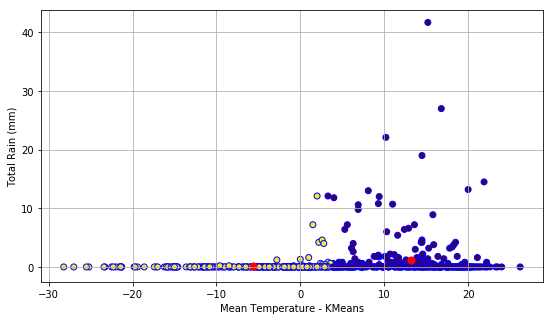

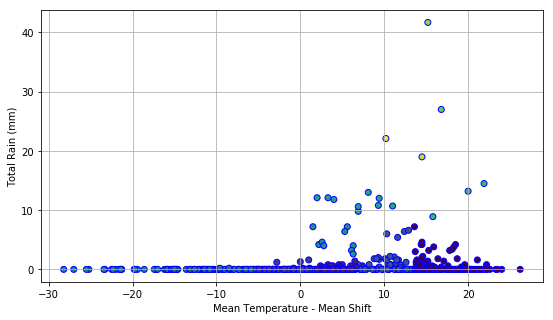

In [23]:
#PERFORMING DBSCAN - MEAN TEMPERATURE vs RAIN

#########################################################################################################################

#SELECTING THE DATASET
Tdata = np.array([data_train['Mean Temp (°C)'],data_train['Total Rain (mm)']])
Ttrue = np.array(data_train['True Classes'])
Tdata=Tdata.T

#Splitting the dataset
Ttrain, Ttest,Ttrue_train,Ttrue_test = train_test_split(Tdata, Ttrue, test_size=0.2)

###########################################################################################################################


#Fitting models
#DBSCAN
db = DBSCAN(eps=3, min_samples=2)
db.fit(Ttrain)

#KMEANS
clust=KMeans(n_clusters=2, n_init=10, tol=0.0001)
clust.fit(Ttrain)
centroids = clust.cluster_centers_

#MEAN SHIFT
ms = MeanShift(bandwidth=4)
ms.fit(Ttrain)
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Ttrain, quantile=0.2, n_samples=3)

###########################################################################################################################


#Plots
#DBSCAN
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=db.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Mean Temperature - DBSCAN")
plt.ylabel("Total Rain (mm)")
plt.title("")
plt.grid()

#KMEANS
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=clust.labels_.astype(float), edgecolor='blue' )
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50 )
plt.xlabel("Mean Temperature - KMeans")
plt.ylabel("Total Rain (mm)")
plt.title("")
plt.grid()

#MEAN SHIFT
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=ms.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Mean Temperature - Mean Shift")
plt.ylabel("Total Rain (mm)")
plt.title("")
plt.grid()


#Calculating parameters

#DBSCAN
H1=metrics.homogeneity_score(Ttrue_train,db.labels_.astype(float))  #Homogeneity
C1=metrics.completeness_score(Ttrue_train,db.labels_.astype(float))
F1=metrics.fowlkes_mallows_score(Ttrue_train,db.labels_.astype(float))

#MEAN SHIFT
H2=metrics.homogeneity_score(Ttrue_train,ms.labels_.astype(float))  #Homogeneity
C2=metrics.completeness_score(Ttrue_train,ms.labels_.astype(float))
F2=metrics.fowlkes_mallows_score(Ttrue_train,ms.labels_.astype(float))

#KMEANS
H3=metrics.homogeneity_score(Ttrue_train,clust.labels_.astype(float))  #Homogeneity
C3=metrics.completeness_score(Ttrue_train,clust.labels_.astype(float))
F3=metrics.fowlkes_mallows_score(Ttrue_train,clust.labels_.astype(float))
clust.predict(Ttest)
scorekmeans=clust.score(Ttest)

print('DBSCAN: Homogeneity is ' + str(round(H1,4)) + '; Completeness is ' + str(round(C1,4)) + '; FMI is ' + str(round(F1,4)))
print(' ')
print('MEAN SHIFT: Homogeneity is ' + str(round(H2,4)) + '; Completeness is ' + str(round(C2,4)) + '; FMI is ' + str(round(F2,4)))
print(' ')
print('KMEANS: Inertia is ' + str(round(-scorekmeans,4)) + ' Homogeneity is ' + str(round(H3,4)) + '; Completeness is ' + str(round(C3,4)) + '; FMI is ' + str(round(F3,4)))

DBSCAN: Homogeneity is 0.0041; Completeness is 0.0163; FMI is 0.6213
 
MEAN SHIFT: Homogeneity is 0.0477; Completeness is 0.0216; FMI is 0.2374
 
KMEANS: Inertia is 11536.5724 Homogeneity is 0.0099; Completeness is 0.0152; FMI is 0.476


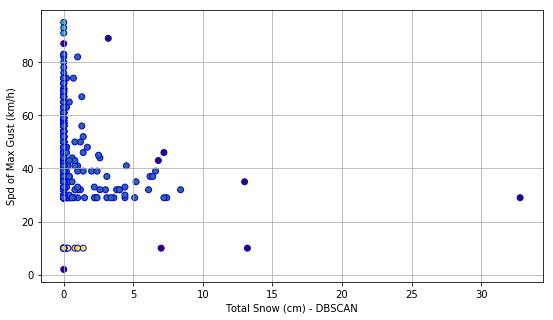

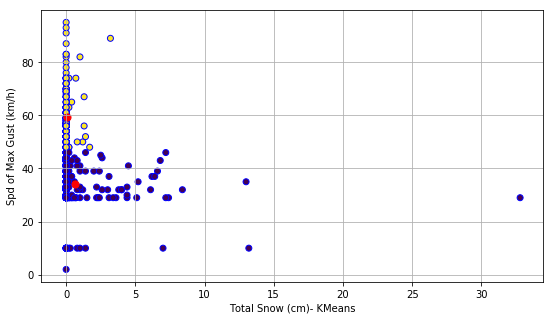

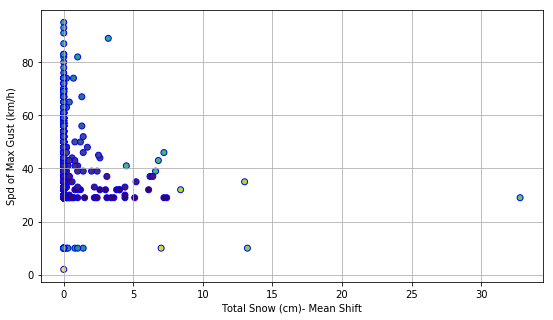

In [24]:
#PERFORMING DBSCAN - SNOW vs Spd of Max Gust (km/h)

#########################################################################################################################

#SELECTING THE DATASET
Tdata = np.array([data_train['Total Snow (cm)'],data_train['Spd of Max Gust (km/h)']])
Ttrue = np.array(data_train['True Classes'])
Tdata=Tdata.T

#Splitting the dataset
Ttrain, Ttest,Ttrue_train,Ttrue_test = train_test_split(Tdata, Ttrue, test_size=0.2)

###########################################################################################################################


#Fitting models
#DBSCAN
db = DBSCAN(eps=3, min_samples=2)
db.fit(Ttrain)

#KMEANS
clust=KMeans(n_clusters=2, n_init=10, tol=0.0001)
clust.fit(Ttrain)
centroids = clust.cluster_centers_

#MEAN SHIFT
ms = MeanShift(bandwidth=4)
ms.fit(Ttrain)
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Ttrain, quantile=0.2, n_samples=3)

###########################################################################################################################


#Plots
#DBSCAN
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=db.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Total Snow (cm) - DBSCAN")
plt.ylabel("Spd of Max Gust (km/h)")
plt.title("")
plt.grid()

#KMEANS
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=clust.labels_.astype(float), edgecolor='blue' )
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50 )
plt.xlabel("Total Snow (cm)- KMeans")
plt.ylabel("Spd of Max Gust (km/h)")
plt.title("")
plt.grid()

#MEAN SHIFT
plt.figure(figsize=(9,5))
plt.scatter(Ttrain[:,0], Ttrain[:,1], c=ms.labels_.astype(float), edgecolor='blue' )
plt.xlabel("Total Snow (cm)- Mean Shift")
plt.ylabel("Spd of Max Gust (km/h)")
plt.title("")
plt.grid()


#Calculating parameters

#DBSCAN
H1=metrics.homogeneity_score(Ttrue_train,db.labels_.astype(float))  #Homogeneity
C1=metrics.completeness_score(Ttrue_train,db.labels_.astype(float))
F1=metrics.fowlkes_mallows_score(Ttrue_train,db.labels_.astype(float))

#MEAN SHIFT
H2=metrics.homogeneity_score(Ttrue_train,ms.labels_.astype(float))  #Homogeneity
C2=metrics.completeness_score(Ttrue_train,ms.labels_.astype(float))
F2=metrics.fowlkes_mallows_score(Ttrue_train,ms.labels_.astype(float))

#KMEANS
H3=metrics.homogeneity_score(Ttrue_train,clust.labels_.astype(float))  #Homogeneity
C3=metrics.completeness_score(Ttrue_train,clust.labels_.astype(float))
F3=metrics.fowlkes_mallows_score(Ttrue_train,clust.labels_.astype(float))
clust.predict(Ttest)
scorekmeans=clust.score(Ttest)

print('DBSCAN: Homogeneity is ' + str(round(H1,4)) + '; Completeness is ' + str(round(C1,4)) + '; FMI is ' + str(round(F1,4)))
print(' ')
print('MEAN SHIFT: Homogeneity is ' + str(round(H2,4)) + '; Completeness is ' + str(round(C2,4)) + '; FMI is ' + str(round(F2,4)))
print(' ')
print('KMEANS: Inertia is ' + str(round(-scorekmeans,4)) + ' Homogeneity is ' + str(round(H3,4)) + '; Completeness is ' + str(round(C3,4)) + '; FMI is ' + str(round(F3,4)))

In [25]:
#PERFORMING DBSCAN - TEMPERATURE VS SNOW VS Spd of Max Gust (km/h)

#########################################################################################################################

#SELECTING THE DATASET
Tdata = np.array([data_train['Mean Temp (°C)'],data_train['Total Snow (cm)'],data_train['Spd of Max Gust (km/h)']])
Ttrue = np.array(data_train['True Classes'])
Tdata=Tdata.T

#Splitting the dataset
Ttrain, Ttest,Ttrue_train,Ttrue_test = train_test_split(Tdata, Ttrue, test_size=0.2)

###########################################################################################################################


#Fitting models
#DBSCAN
db = DBSCAN(eps=3, min_samples=2)
db.fit(Ttrain)

#KMEANS
clust=KMeans(n_clusters=2, n_init=10, tol=0.0001)
clust.fit(Ttrain)
centroids = clust.cluster_centers_

#MEAN SHIFT
ms = MeanShift(bandwidth=4)
ms.fit(Ttrain)
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(Ttrain, quantile=0.2, n_samples=3)

###########################################################################################################################
#Calculating parameters

#DBSCAN
H1=metrics.homogeneity_score(Ttrue_train,db.labels_.astype(float))  #Homogeneity
C1=metrics.completeness_score(Ttrue_train,db.labels_.astype(float))
F1=metrics.fowlkes_mallows_score(Ttrue_train,db.labels_.astype(float))

#MEAN SHIFT
H2=metrics.homogeneity_score(Ttrue_train,ms.labels_.astype(float))  #Homogeneity
C2=metrics.completeness_score(Ttrue_train,ms.labels_.astype(float))
F2=metrics.fowlkes_mallows_score(Ttrue_train,ms.labels_.astype(float))

#KMEANS
H3=metrics.homogeneity_score(Ttrue_train,clust.labels_.astype(float))  #Homogeneity
C3=metrics.completeness_score(Ttrue_train,clust.labels_.astype(float))
F3=metrics.fowlkes_mallows_score(Ttrue_train,clust.labels_.astype(float))
clust.predict(Ttest)
scorekmeans=clust.score(Ttest)

print('DBSCAN: Homogeneity is ' + str(round(H1,4)) + '; Completeness is ' + str(round(C1,4)) + '; FMI is ' + str(round(F1,4)))
print(' ')
print('MEAN SHIFT: Homogeneity is ' + str(round(H2,4)) + '; Completeness is ' + str(round(C2,4)) + '; FMI is ' + str(round(F2,4)))
print(' ')
print('KMEANS: Inertia is ' + str(round(-scorekmeans,4)) + ' Homogeneity is ' + str(round(H3,4)) + '; Completeness is ' + str(round(C3,4)) + '; FMI is ' + str(round(F3,4)))

DBSCAN: Homogeneity is 0.05; Completeness is 0.0553; FMI is 0.5603
 
MEAN SHIFT: Homogeneity is 0.1644; Completeness is 0.0447; FMI is 0.1284
 
KMEANS: Inertia is 27964.7438 Homogeneity is 0.0136; Completeness is 0.0201; FMI is 0.4679


In [6]:
#SUPERVISED LEARNING

#################                          DECISION TREE - RANDOM FOREST                                     ##########################
##################################################################################################################
from sklearn.ensemble import RandomForestRegressor

#Output
Ydata = np.array([data_train['True Classes']])
Ydata = Ydata.T

#Third Model - Temperature, Snow and Wind
Xdata = np.array([data_train['Mean Temp (°C)'],data_train['Total Snow (cm)'],data_train['Spd of Max Gust (km/h)']])
Xdata= Xdata.T

#Splitting the dataset
Xtrain, Xtest,Ytrain,Ytest = train_test_split(Xdata, Ydata, test_size=0.2)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(Xtrain, Ytrain.ravel())

# Use the forest's predict method on the test data
predictions = rf.predict(Xtest)

# Calculate the absolute errors
errors = abs(np.round(predictions.reshape(142,1)) - Ytest)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2))

#Calculate Accuracy
acc = np.zeros(len(predictions))
for i in range(len(predictions)):
    if round(predictions[i]) == Ytest[i]:
        acc[i] = 1
    else:
        acc[i] = 0
accuracy = np.sum(acc)/len(acc)

print("The accuracy of Random Forest is",round(accuracy*100,2),"%")

Mean Absolute Error: 0.66
The accuracy of Random Forest is 42.96 %
